<a href="https://colab.research.google.com/github/venyaj2/solar-system/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
import torch
from torchvision.datasets import Flowers102
%matplotlib inline
from matplotlib import pyplot as plt
import json
import os
import os.path as osp

In [ ]:
drive.mount('/content/drive')
datadir = "/content/drive/My Drive/Colab Notebooks/CS441/Final Project/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load data
train_data = pd.read_csv(datadir +'train.csv')
test_data = pd.read_csv(datadir +'test.csv')

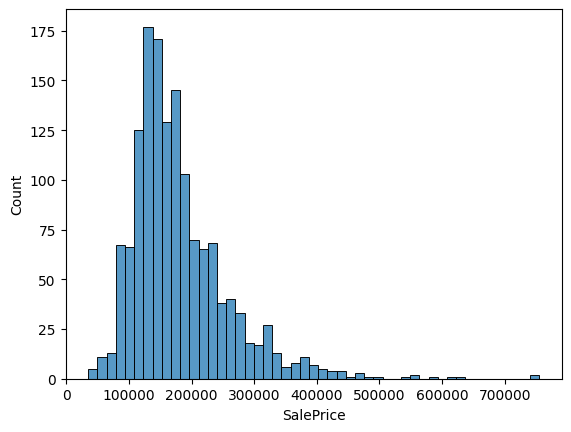

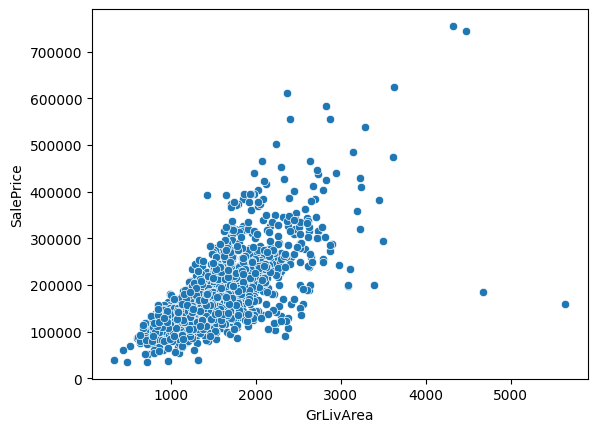

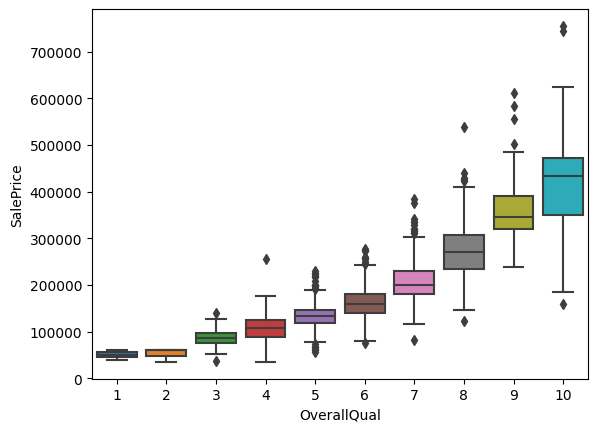

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualize distribution of target variable
sns.histplot(train_data['SalePrice'])
plt.show()

# visualize correlation between numerical features and target variable
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
plt.show()

# visualize relationship between categorical features and target variable
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)
plt.show()

In [ ]:
# fill missing values with the mean of the column
train_data.fillna(train_data.mean(), inplace=True)

# handle categorical variables using one-hot encoding
train_data = pd.get_dummies(train_data)

# scale numerical features using MinMaxScaler
scaler = MinMaxScaler()
num_cols = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])

<ipython-input-39-37de68cdfd83>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.fillna(train_data.mean(), inplace=True)


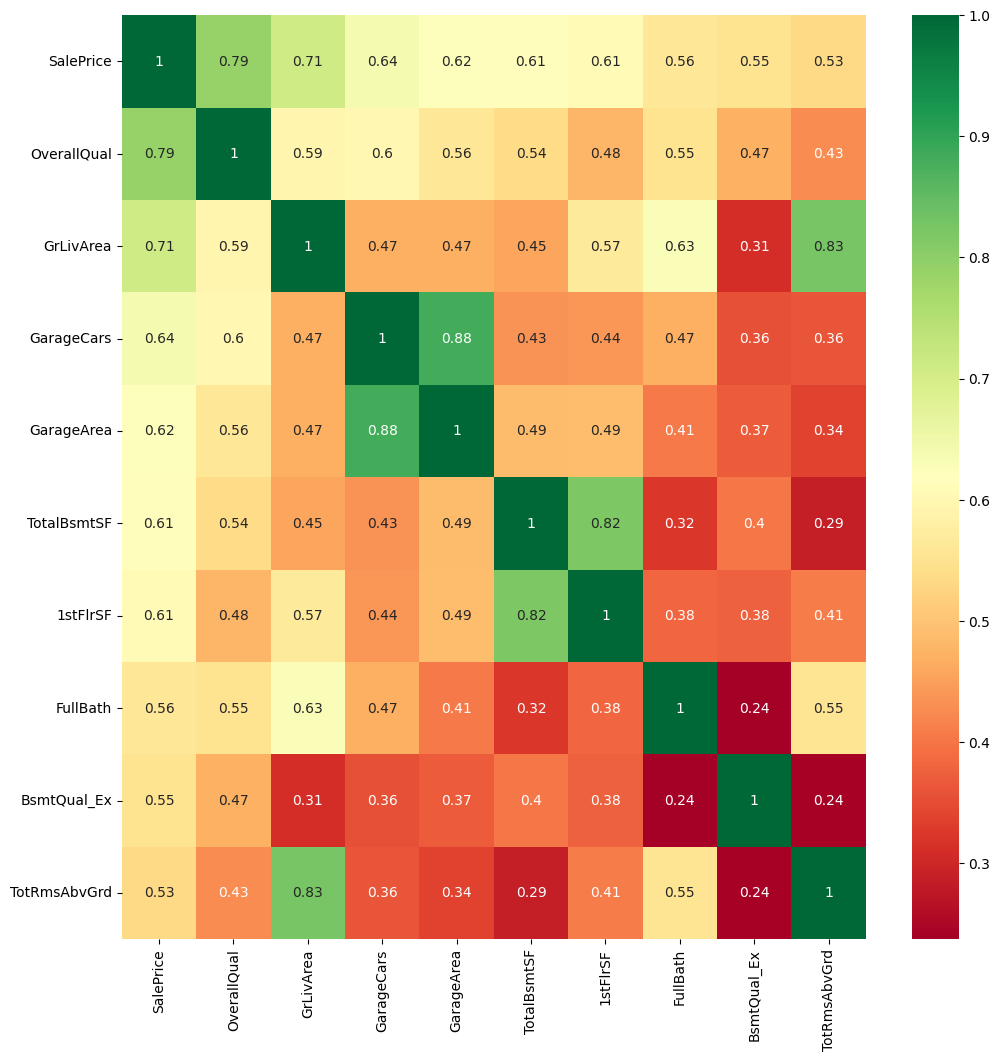

In [ ]:
# compute the correlation matrix
corr_matrix = train_data.corr()

# find the top N features with highest correlation with SalePrice
N = 10
top_features = corr_matrix.nlargest(N, 'SalePrice')['SalePrice'].index
top_corr = train_data[top_features].corr()

# plot the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(top_corr, annot=True, cmap='RdYlGn')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train_data.fillna(train_data.mean(), inplace=True)
train_data = pd.get_dummies(train_data)
scaler = MinMaxScaler()
num_cols = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])

# select features
selected_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

# split the data into training and testing sets
X = train_data[selected_features].drop('SalePrice', axis=1)
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model on the testing set
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R^2 score: {r2:.3f}')
print(f'Root mean squared error: {rmse:.3f}')

R^2 score: 0.794
Root mean squared error: 39710.990


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# read in the preprocessed data
train_data = pd.read_csv(datadir + 'train.csv')
train_data.fillna(train_data.mean(), inplace=True)
train_data = pd.get_dummies(train_data)
scaler = MinMaxScaler()
num_cols = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])

# select features
selected_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

# split the data into training and testing sets
X = train_data[selected_features].drop('SalePrice', axis=1)
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# perform grid search to tune hyperparameters
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
model = Lasso()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# evaluate the best model on the testing set
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R^2 score: {r2:.3f}')
print(f'Root mean squared error: {rmse:.3f}')

<ipython-input-42-fe9c59e7f66d>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.fillna(train_data.mean(), inplace=True)


R^2 score: 0.794
Root mean squared error: 39710.990


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data.drop('SalePrice', axis=1), train_data['SalePrice'], test_size=0.2, random_state=42)

alphas = [0.1, 1, 10, 100, 1000]
best_alpha = None
best_rmse = float('inf')

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f'Alpha: {alpha:.1f}, RMSE: {rmse:.4f}')
    if rmse < best_rmse:
        best_alpha = alpha
        best_rmse = rmse

print(f'Best alpha: {best_alpha:.1f}, Best RMSE: {best_rmse:.4f}')

Alpha: 0.1, RMSE: 29072.7750
Alpha: 1.0, RMSE: 30094.9723
Alpha: 10.0, RMSE: 31051.6955
Alpha: 100.0, RMSE: 33147.4142
Alpha: 1000.0, RMSE: 37268.0085
Best alpha: 0.1, Best RMSE: 29072.7750


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.155e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


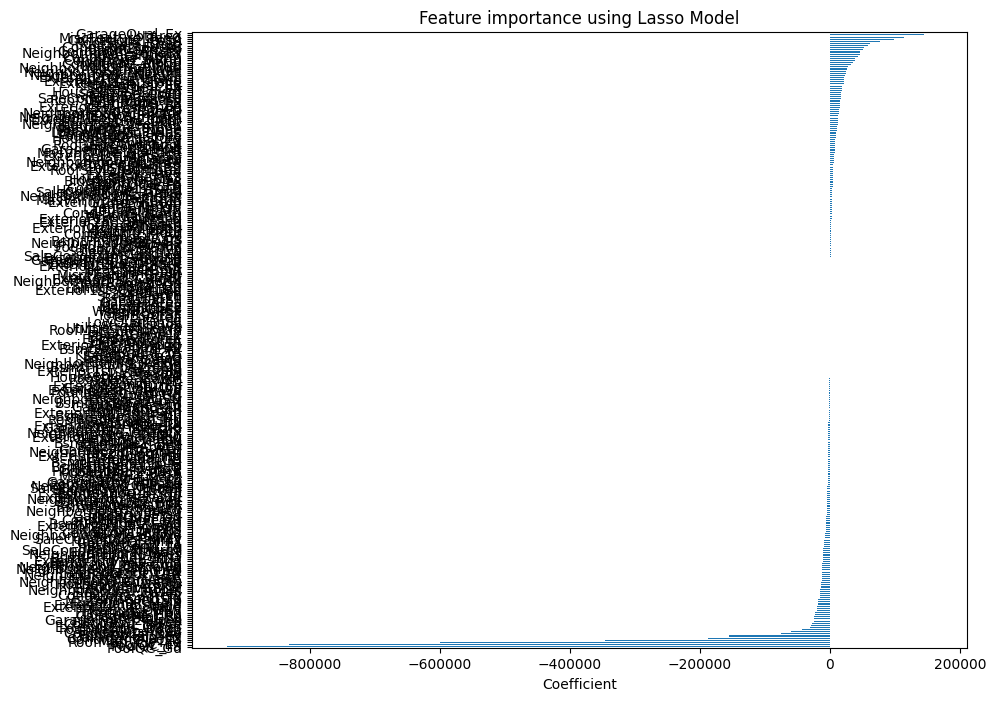

In [ ]:
import matplotlib.pyplot as plt

# fit the Lasso model to the entire training set
lasso = Lasso(alpha=best_model.alpha)
lasso.fit(X_train, y_train)

# plot the feature importance
coef = pd.Series(lasso.coef_, index=X_train.columns)
imp_coef = coef.sort_values()
plt.figure(figsize=(10, 8))
imp_coef.plot(kind='barh')
plt.title('Feature importance using Lasso Model')
plt.xlabel('Coefficient')
plt.show()

In [ ]:
# read in the test data
test_data = pd.read_csv(datadir + 'test.csv')

# preprocess the test data
test_data.fillna(test_data.mean(), inplace=True)
test_data = pd.get_dummies(test_data)
test_data[num_cols] = scaler.transform(test_data[num_cols])

# select the same features as the training data
X_test = test_data[selected_features[1:]]

# make predictions using the best model
y_pred = best_model.predict(X_test)

# create a submission dataframe and save it to a CSV file
submission_df = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_pred})
submission_df.to_csv('submission.csv', index=False)

<ipython-input-45-0efe8990aa9c>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data.fillna(test_data.mean(), inplace=True)
